<a href="https://colab.research.google.com/github/ai-academy-ro/IBR_ML_Python/blob/main/6_0_ML_Programming_Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting house prices**

# **1. Dataset description**

Number of Attributes: 4 textual attributes in addition to the visual attributes that can be extracted from the images.

Attribute Information:
- Number of bedrooms
- Number of bathrooms
- Area (i.e., square footage)
- Zip code

For more info and credits visit:\
https://github.com/omarsayed7/House-price-estimation-from-visual-and-textual-features

<a id="Libraries"></a> <br>
# **2. Libraries and data**

In [1]:
import warnings
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1Ithoy81UTGXRMdAtENRTSrs97QFJmqko/view?usp=sharing'

id = link.split("/")[-2]
filename= 'HousesInfo.txt'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile(filename)

In [5]:
header = ['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']
df = pd.read_csv(filename, header=None, delimiter=' ', names=header)

<a id="Known"></a> <br>
# **3. First look at the data**

In [6]:
#Searching for null values,data types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   535 non-null    int64  
 1   bathrooms  535 non-null    float64
 2   area       535 non-null    int64  
 3   zipcode    535 non-null    int64  
 4   price      535 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 21.0 KB


In [7]:
#Looking at unique values
df.nunique()

,0
bedrooms,9
bathrooms,14
area,435
zipcode,49
price,369


In [8]:
#Looking at a data sample
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.00,4053,85255,869500
1,4,3.00,3343,36372,865200
2,3,4.00,3923,85266,889000
3,5,5.00,4022,85262,910000
4,3,4.00,4116,85266,971226


<Axes: xlabel='price', ylabel='Count'>

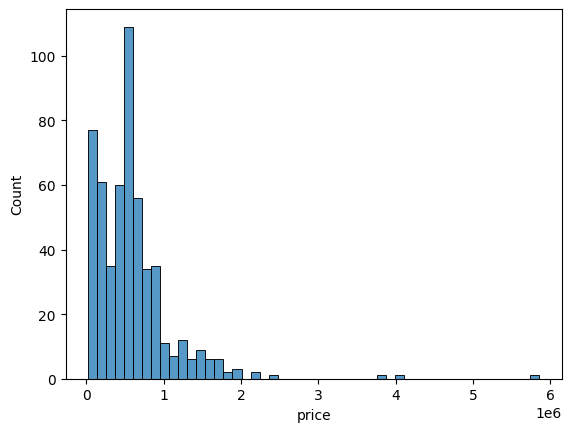

In [9]:
sns.histplot(df['price'])

<Axes: ylabel='price'>

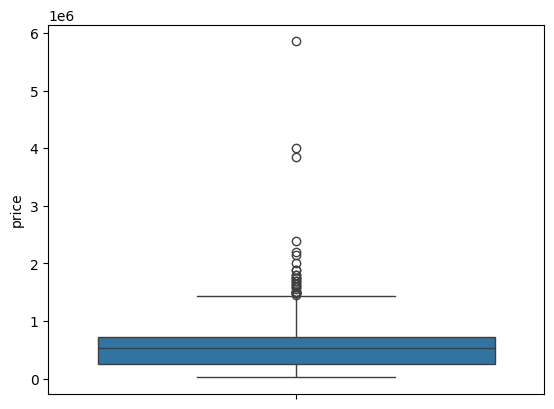

In [10]:
sns.boxplot(df['price'])

In [11]:
df = df[df['price']<1500000]

# **4. Feature Engineering** <a id="Feature Engineering"></a> <br>

## Null treatement

In [12]:
# Null treatement

## Treatement of Categorical variables

In [13]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,175
4,133
2,123
5,58
6,10
1,5
7,3
8,2
10,1


In [14]:
df['bathrooms'].value_counts()

,count
bathrooms,
2.00,215
3.00,93
2.50,65
4.00,39
3.50,29
1.00,24
5.00,14
1.50,14
4.50,11


In [15]:
# round bathrooms to full integer values
df['bathrooms'] = df['bathrooms'].round(0)

In [16]:
df['zipcode'].value_counts()

,count
zipcode,
92276,100
93510,59
93446,52
92880,49
94501,40
91901,32
94531,22
92677,22
92021,11


In [17]:
# Put all zipcodes with less than 4 frequency in Other category
zip_counts = df['zipcode'].value_counts()
df['zip_code'] = df['zipcode'].apply(lambda z: str(z) if zip_counts[z] >= 4 else 'Other')

# Display the resulting value counts of the 'zip_code' column
df['zip_code'].value_counts()

,count
zip_code,
92276,100
93510,59
93446,52
92880,49
94501,40
Other,36
91901,32
94531,22
92677,22


In [18]:
y = df['price']   # Separate target variable
df.drop(['price', 'zipcode'], axis = 1, inplace=True)  # delete unecessary columns

In [19]:
categ = list(df.select_dtypes(['object']).columns) + list(df.select_dtypes(['category']).columns)
print(categ)

['zip_code']


In [20]:
# One hot encoder for Categorical Variables
print('Data frame shape before Categorical Values encoding: ',df.shape)
df = pd.get_dummies(data=df, columns=categ, dtype=int)
print('Data frame shape after Categorical Values encoding: ',df.shape)


Data frame shape before Categorical Values encoding:  (510, 4)
Data frame shape after Categorical Values encoding:  (510, 24)


In [71]:
df.head()

,bedrooms,bathrooms,area,zip_code_62214,zip_code_62234,zip_code_81524,zip_code_85255,zip_code_85262,zip_code_85266,zip_code_91901,...,zip_code_92880,zip_code_93111,zip_code_93446,zip_code_93510,zip_code_94501,zip_code_94531,zip_code_95220,zip_code_96019,zip_code_98021,zip_code_Other
0,4,4.00,4053,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,3.00,3343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,4.00,3923,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5.00,4022,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4.00,4116,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the correlation of the data

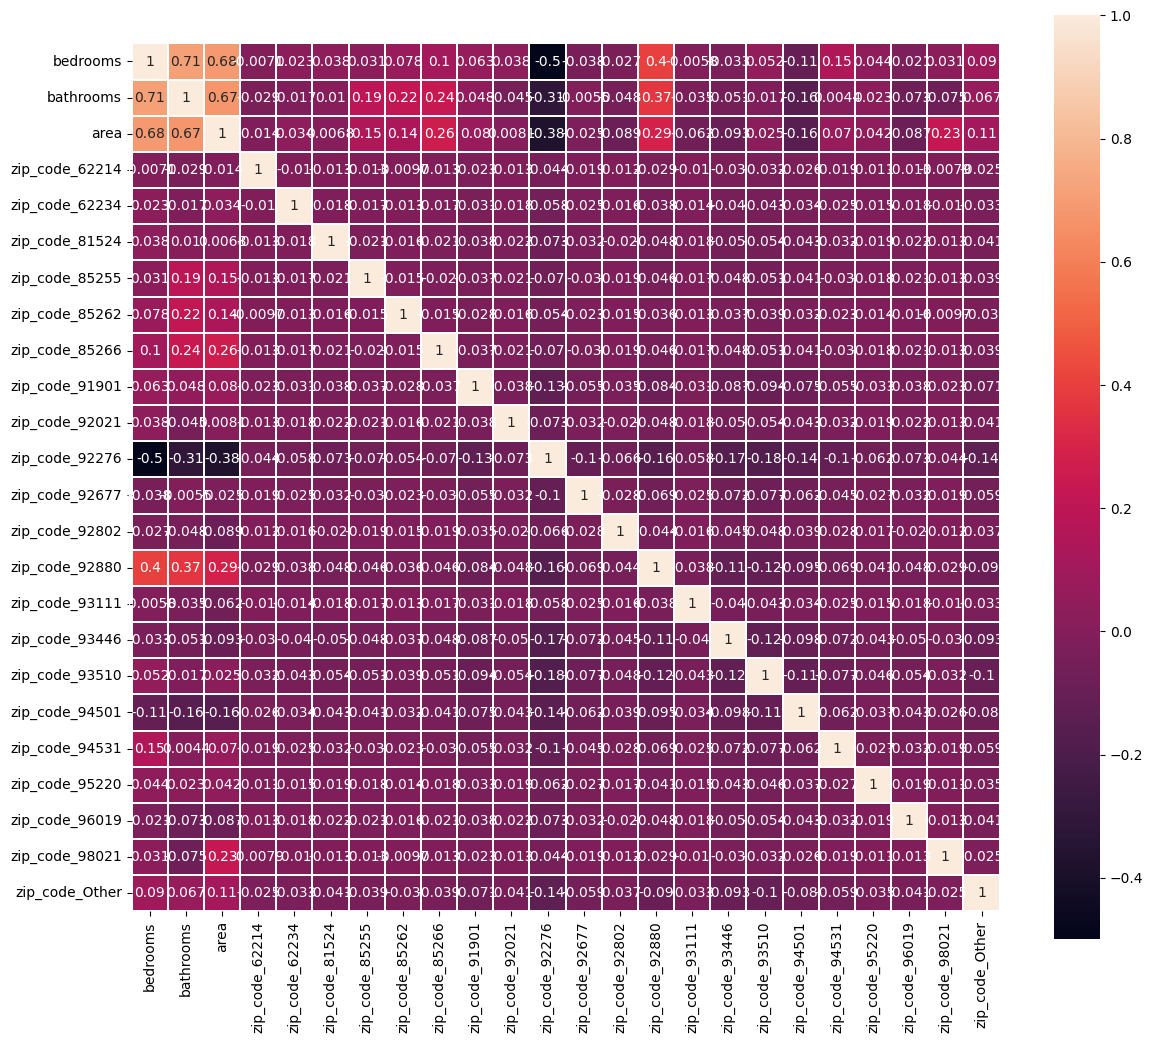

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,  linecolor='white', annot=True)
plt.show()

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(df, 0.9)
print(corr_features)

for column in corr_features:
  df.drop(column, axis=1,inplace=True)

set()


# **5. Train/Test split and Scaling** <a id="Train/Test split and Scaling"></a> <br>


## Import libraries

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Prepare and split Dataset into Train and Test

In [26]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

## Scale input for distance-based models (Linear Regression, Support Vector Regressor)

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [28]:
# normalize target
max_price = y_train.max()
y_train = y_train/ max_price
y_test = y_test / max_price

# **6. Implement models** <a id="Implement models"></a> <br>

### Define model evaluation function


In [29]:
def model_eval(model,X_test,y_test):
  y_pred = model.predict(X_test)

  y_pred_orig = y_pred * max_price
  y_test_orig = y_test * max_price

  print("Test mean           : {:.2f}".format(np.mean(y_test_orig)))
  print("Price Std (baseline): {:.2f}".format(np.std(y_test_orig)))
  print("Test RMSE           : {:.2f}".format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))))
  print("Test MAE            : {:.2f}".format(mean_absolute_error(y_test_orig,y_pred_orig)))
  print("R² score            : {:.4f}".format(r2_score(y_test_orig,y_pred_orig)))

### Linear Regression

In [30]:
# import libraries
from sklearn.linear_model import LinearRegression

In [31]:
# train the model
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)

LinearRegression()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [32]:
# predict on test data
y_pred = model_LR.predict(X_test_scaled)

In [33]:
# evaluate the model results
model_eval(model_LR,X_test_scaled,y_test)

Test mean           : 535834.30
Price Std (baseline): 313060.75
Test RMSE           : 197059.48
Test MAE            : 126656.14
R² score            : 0.6038


In [34]:
# Print intercept and coefficients
print('Model intercept: ' + str(model_LR.intercept_))

# Create a DataFrame for coefficients
coefficients = pd.DataFrame(model_LR.coef_.T, index=X_train.columns, columns=['coef'])

# Sort coefficients in descending order
coefficients = coefficients.sort_values(by='coef', ascending=False)

# Print the DataFrame
print(coefficients)

# For every one-unit increase in [X variable], the [y variable] increases
# by [coefficient] when all other variables are held constant.

Model intercept: 0.18240850227638222
                coef
area            0.39
zip_code_93111  0.32
bathrooms       0.30
zip_code_94501  0.23
zip_code_95220  0.17
zip_code_92677  0.17
zip_code_85262  0.15
bedrooms        0.15
zip_code_85255  0.15
zip_code_91901  0.07
zip_code_85266  0.07
zip_code_92802  0.03
zip_code_92021  0.03
zip_code_93510 -0.02
zip_code_93446 -0.02
zip_code_81524 -0.06
zip_code_Other -0.06
zip_code_98021 -0.07
zip_code_94531 -0.13
zip_code_92880 -0.14
zip_code_96019 -0.17
zip_code_92276 -0.20
zip_code_62214 -0.25
zip_code_62234 -0.27


### Decision Tree Regressor

In [35]:
# import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [36]:
# train the model
model_DT = DecisionTreeRegressor(max_depth=4, random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [37]:
# predict on test data
y_pred = model_DT.predict(X_test)

In [38]:
model_eval(model_DT,X_test,y_test)

Test mean           : 535834.30
Price Std (baseline): 313060.75
Test RMSE           : 208825.83
Test MAE            : 141033.65
R² score            : 0.5551


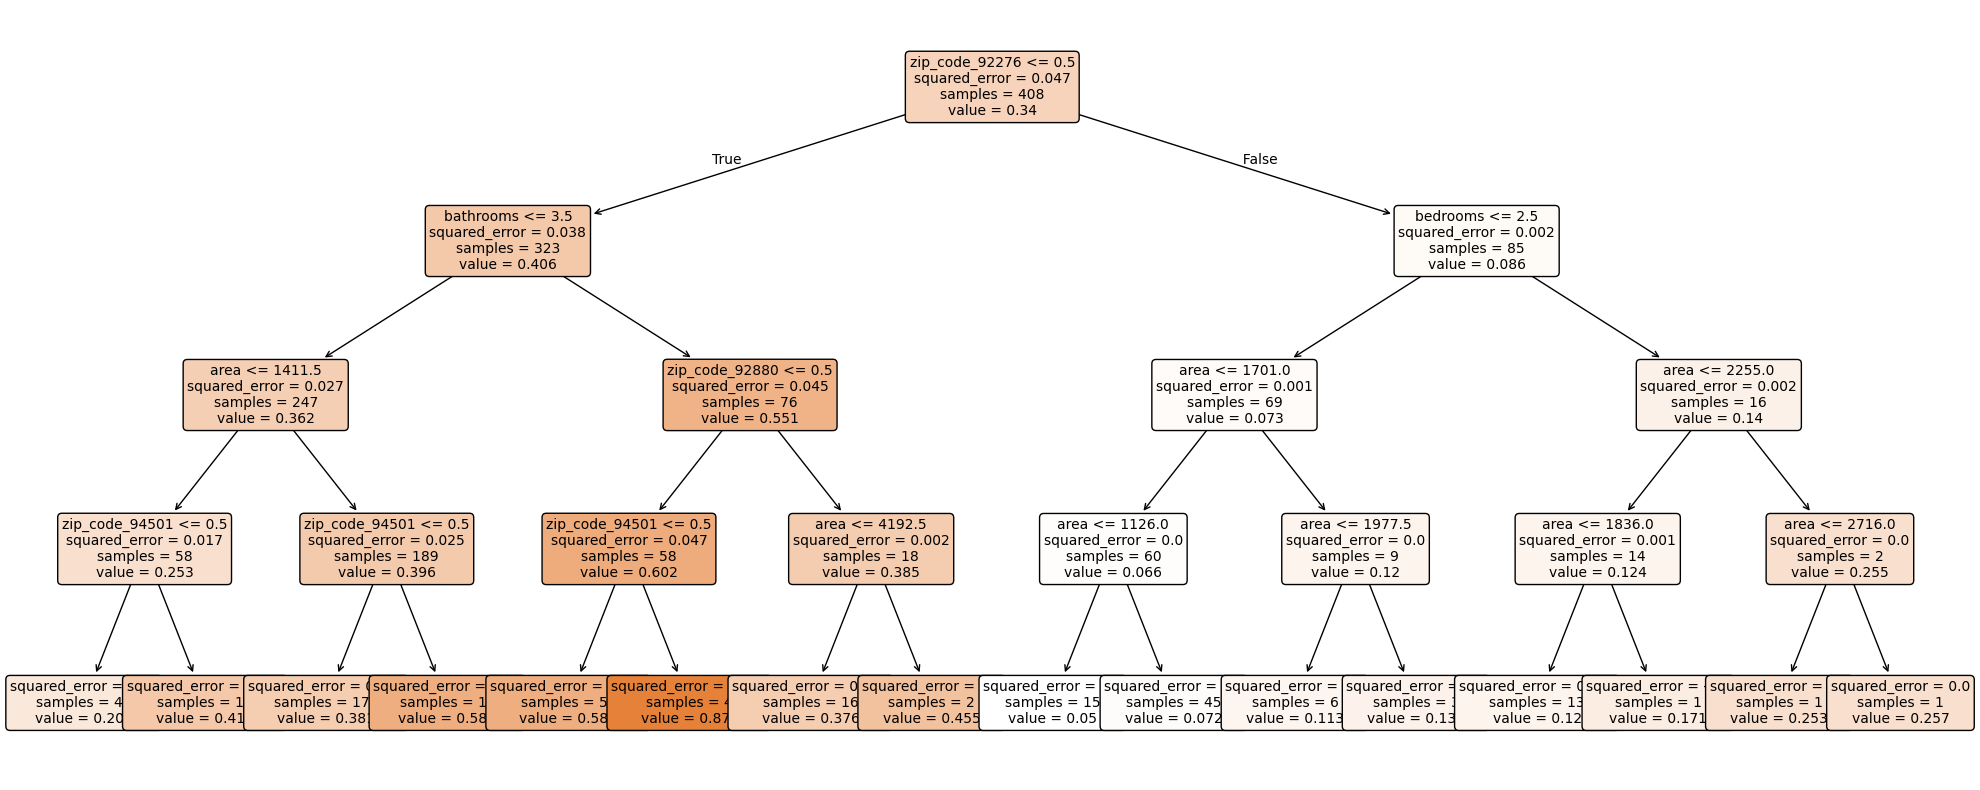

In [39]:
# plot tree
plt.figure(figsize=(25,10))  # set plot size (denoted in inches)
tree.plot_tree(model_DT, fontsize=10,
               feature_names=X_train.columns, class_names=['good','bad'],
               filled=True, rounded=True)
plt.show()

In [40]:
from sklearn.tree import export_text
r = export_text(model_DT, feature_names=list(X_train.columns))
print(r)

|--- zip_code_92276 <= 0.50
|   |--- bathrooms <= 3.50
|   |   |--- area <= 1411.50
|   |   |   |--- zip_code_94501 <= 0.50
|   |   |   |   |--- value: [0.20]
|   |   |   |--- zip_code_94501 >  0.50
|   |   |   |   |--- value: [0.41]
|   |   |--- area >  1411.50
|   |   |   |--- zip_code_94501 <= 0.50
|   |   |   |   |--- value: [0.38]
|   |   |   |--- zip_code_94501 >  0.50
|   |   |   |   |--- value: [0.58]
|   |--- bathrooms >  3.50
|   |   |--- zip_code_92880 <= 0.50
|   |   |   |--- zip_code_94501 <= 0.50
|   |   |   |   |--- value: [0.58]
|   |   |   |--- zip_code_94501 >  0.50
|   |   |   |   |--- value: [0.88]
|   |   |--- zip_code_92880 >  0.50
|   |   |   |--- area <= 4192.50
|   |   |   |   |--- value: [0.38]
|   |   |   |--- area >  4192.50
|   |   |   |   |--- value: [0.45]
|--- zip_code_92276 >  0.50
|   |--- bedrooms <= 2.50
|   |   |--- area <= 1701.00
|   |   |   |--- area <= 1126.00
|   |   |   |   |--- value: [0.05]
|   |   |   |--- area >  1126.00
|   |   |   |   |-

Further reading:\
https://scikit-learn.org/stable/modules/tree.html


### Ensemble methods: Random Forrest Regressor

In [41]:
# import libraries
from sklearn.ensemble import RandomForestRegressor

In [42]:
# train the model
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [43]:
# predict on test data
y_pred = model_RF.predict(X_test)

In [44]:
model_eval(model_RF,X_test,y_test)

Test mean           : 535834.30
Price Std (baseline): 313060.75
Test RMSE           : 175945.51
Test MAE            : 109466.91
R² score            : 0.6841


### Ensemble methods: XGBoost Regressor

In [45]:
# import libraries
from xgboost import XGBRegressor

In [46]:
# train the model
model_XGB = XGBRegressor(objective ='reg:squarederror', random_state=42)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

https://xgboost.readthedocs.io/en/latest/parameter.html

In [47]:
# predict on test data
y_pred = model_XGB.predict(X_test)

In [48]:
model_eval(model_XGB,X_test,y_test)

Test mean           : 535834.30
Price Std (baseline): 313060.75
Test RMSE           : 225223.50
Test MAE            : 133761.99
R² score            : 0.4824


# **7. Model Selection** <a id="Model Selection"></a> <br>

In [49]:
def run_models(X_train, X_train_scaled, y_train, n_splits):
  # prepare models
  models = []
  model_names = ['LR','DT','RF','XGB']
  models.append(('Linear Regression       ', model_LR))
  models.append(('Decision Tree Regressor ', model_DT))
  models.append(('Random Forest Regressor ', model_RF))
  models.append(('XGBoost Regressor       ', model_XGB))

  # evaluate each model in turn
  results = []
  names = []
  scoring='r2'

  print('Model                    | R2')
  for name, model in models:
    kfold = KFold(n_splits=n_splits)
    cv_results = cross_val_score(model, X_train_scaled, y_train,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s | %.4f " % (name, cv_results.mean() )
    print(msg)
  print('')

  # boxplot model comparison
  fig = plt.figure(figsize=(8,4))
  fig.suptitle('Models Performance Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(model_names)
  plt.show()

Model                    | R2
Linear Regression        | 0.6987 
Decision Tree Regressor  | 0.4871 
Random Forest Regressor  | 0.7055 
XGBoost Regressor        | 0.6581 



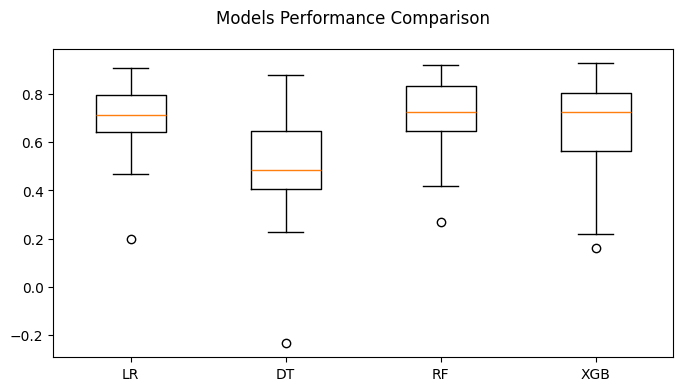

In [50]:
run_models(X_train, X_train_scaled, y_train,25)

# **8. Hyperparameter Tuning** <a id="Hyperparameter Tuning"></a> <br>

In [51]:
regressor = model_XGB
params = {'max_depth':[4,5,6],
          'n_estimators':[300,400,500,600],
          'learning_rate':[0.03,0.05,0.07,0.09]}
#          'min_child_weight':[3,5,10],
#          'gamma':[0.0, 0.1, 0.2],
#          'subsample':[i/100.0 for i in range(75,90,5)],
#          'colsample_bytree':[i/100.0 for i in range(75,90,5)]}

grid_search = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=4,verbose=3)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.03, 0.05, 0.07, 0.09],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [52]:
print('Best score     :',grid_search.best_score_)
print('Best parameters:',grid_search.best_params_)
regressor = grid_search.best_estimator_

Best score     : -0.1085302959416133
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}


In [53]:
# Predict results on test data
y_pred = regressor.predict(X_test_scaled)

In [54]:
model_eval(regressor,X_test_scaled,y_test)

Test mean           : 535834.30
Price Std (baseline): 313060.75
Test RMSE           : 190029.42
Test MAE            : 113505.65
R² score            : 0.6315


# **9. Model Explainability** <a id="Model Explainability"></a> <br>

In [55]:
!pip install shap

In [56]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer(X_test)
shap_values.data = np.array(shap_values.data, dtype=float)

# Convert shap_value contributions to price values, in milions
shap_values_target = shap_values * max_price / 1e6
shap_values_target.data = shap_values.data #revert data values to original, for labels

### Global Interpretability

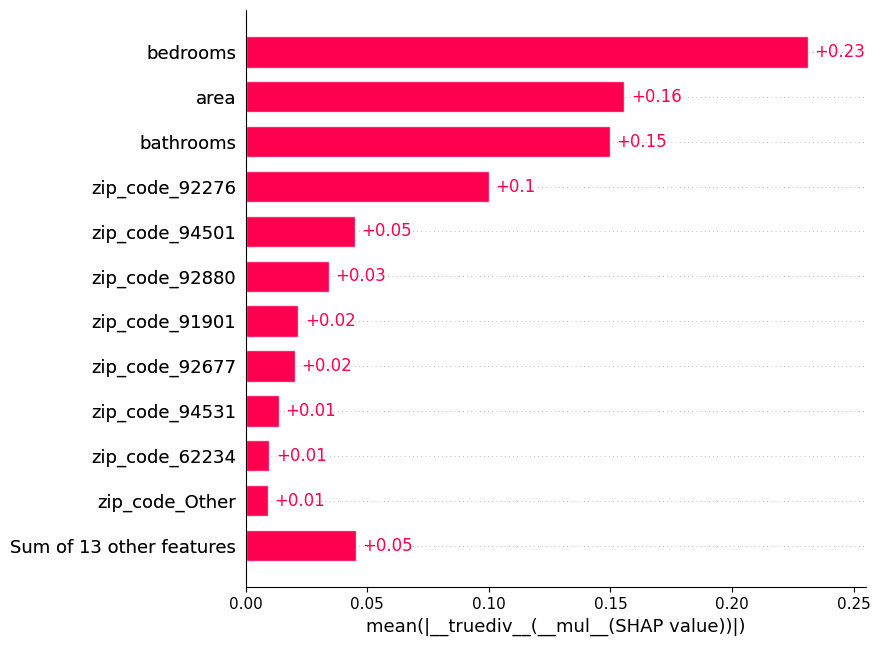

In [57]:
# Feature importance - bar plot
shap.plots.bar(shap_values_target, max_display=12) # default is max_display=12

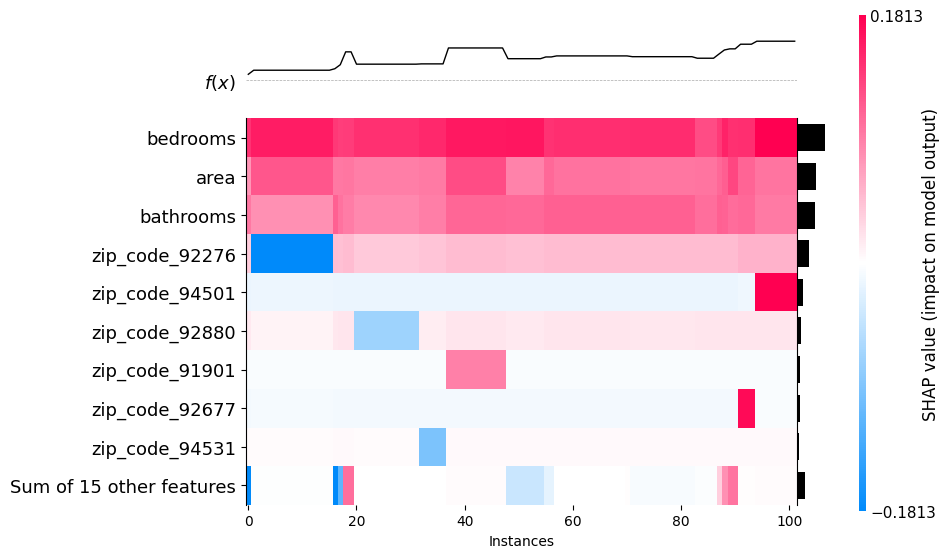

<Axes: xlabel='Instances'>

In [58]:
# Heatmap
shap.plots.heatmap(shap_values)

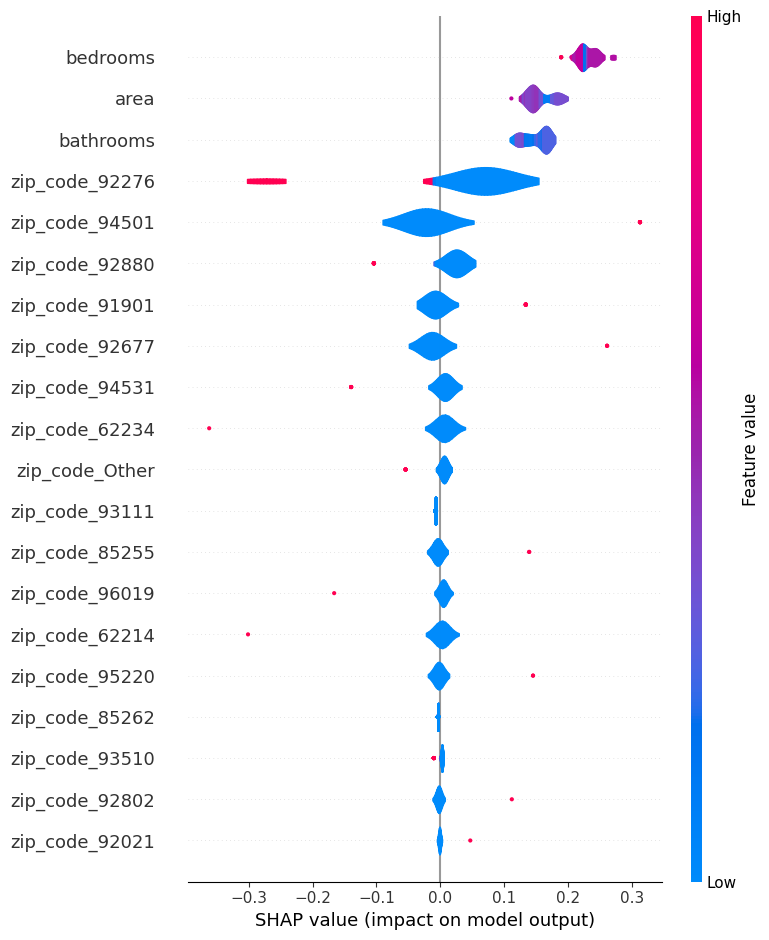

In [59]:
# Feature importance and contribution - violin plot
shap.summary_plot(shap_values_target, shap_values.data, plot_type="violin")

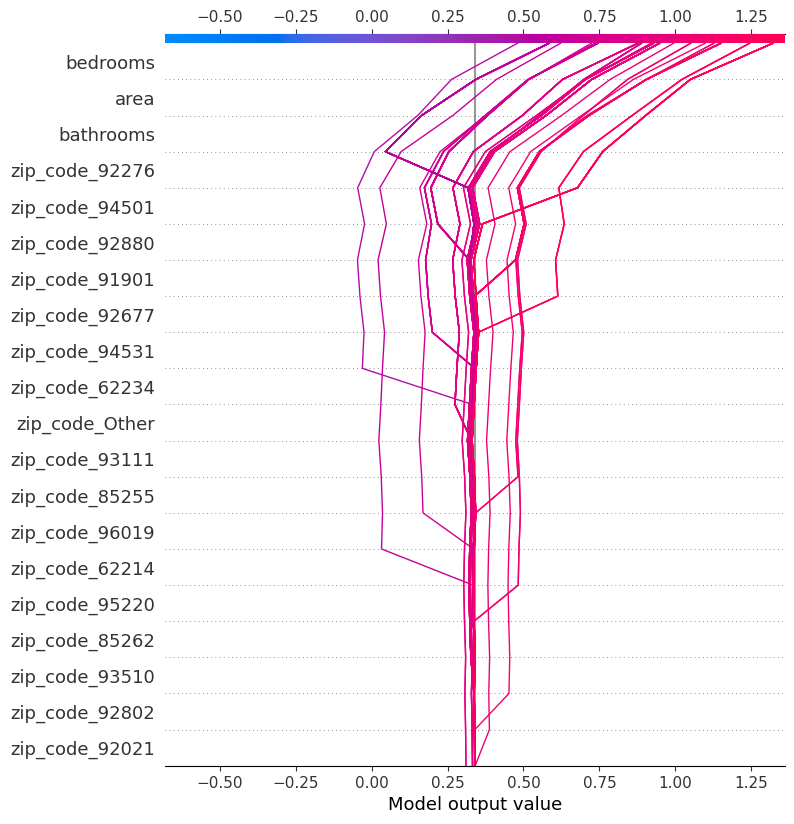

In [60]:
# Shap decision plot
r = shap.decision_plot(explainer.expected_value, shap_values_target.values,  X_test)

### Local Interpretability

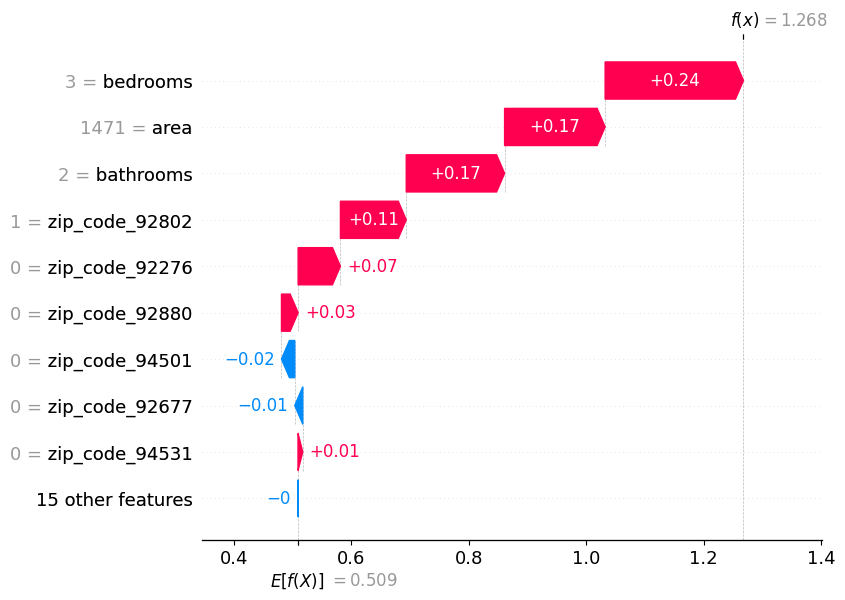

In [61]:
# Individual waterfall plot
obs = 0
shap.plots.waterfall(shap_values_target[obs])

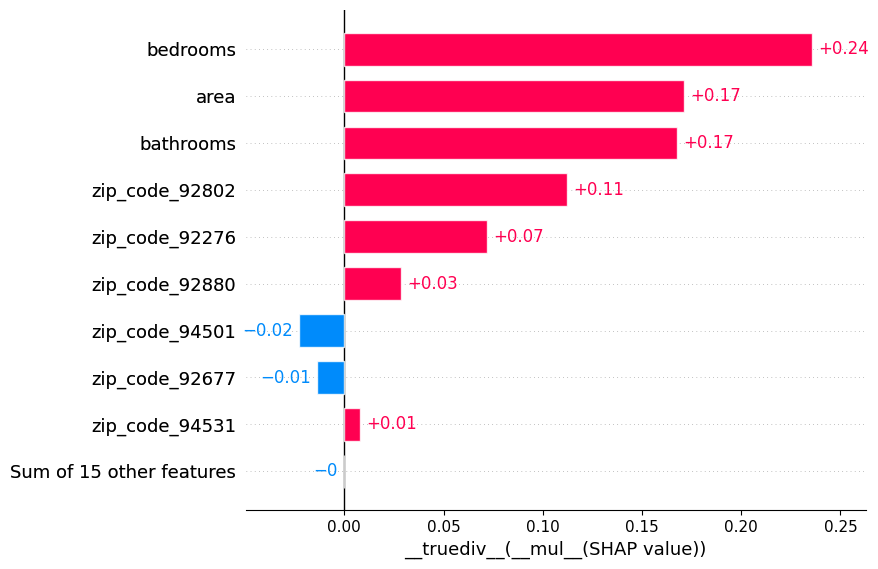

In [62]:
# Individual bar plot
obs = 0
shap.plots.bar(shap_values_target[obs])

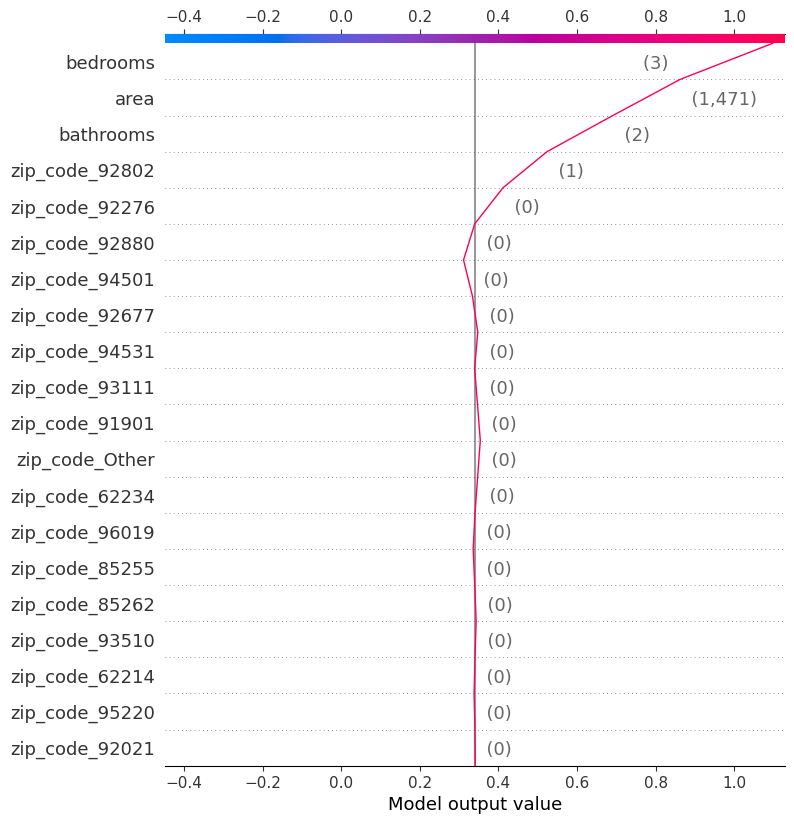

In [63]:
# Individual decision plot
obs = 0
shap.decision_plot(explainer.expected_value, shap_values_target.values[obs], X_test.iloc[obs])

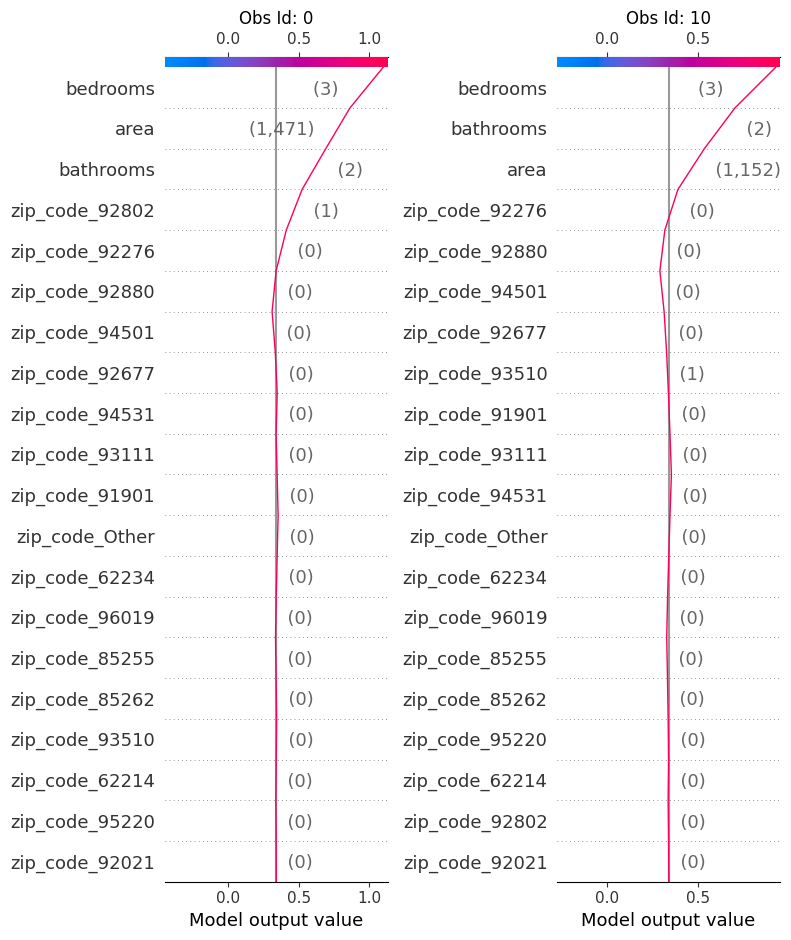

In [64]:
# Individual decision plot comparison for two observations
obs1=0
obs2=10

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
shap.decision_plot(explainer.expected_value, shap_values_target.values[obs1], X_test.iloc[obs1], show=False)

ax1.title.set_text('Obs Id: '+str(obs1))
ax2 = fig.add_subplot(122)
shap.decision_plot(explainer.expected_value, shap_values_target.values[obs2], X_test.iloc[obs2], show=False)
ax2.title.set_text('Obs Id: '+str(obs2))
plt.tight_layout()
plt.show()

In [65]:
# Individual force plot
shap.initjs()
obs=3
shap.force_plot(explainer.expected_value, shap_values_target.values[obs], X_test.iloc[obs])

In [66]:
# Interactive general force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_target.values, X_test)

In [67]:
# Dependence plots
X_test.columns

Index(['bedrooms', 'bathrooms', 'area', 'zip_code_62214', 'zip_code_62234',
       'zip_code_81524', 'zip_code_85255', 'zip_code_85262', 'zip_code_85266',
       'zip_code_91901', 'zip_code_92021', 'zip_code_92276', 'zip_code_92677',
       'zip_code_92802', 'zip_code_92880', 'zip_code_93111', 'zip_code_93446',
       'zip_code_93510', 'zip_code_94501', 'zip_code_94531', 'zip_code_95220',
       'zip_code_96019', 'zip_code_98021', 'zip_code_Other'],
      dtype='object')

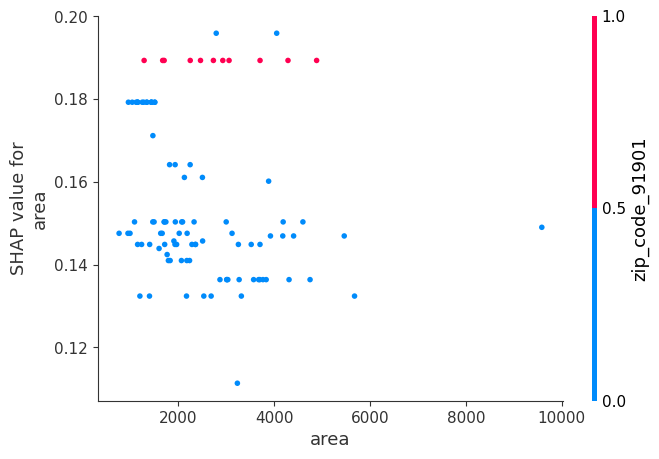

In [68]:
# Dependence plots based on a feature with automatic interaction feature
feature = "area"
shap.dependence_plot(feature, shap_values_target.values, X_test)

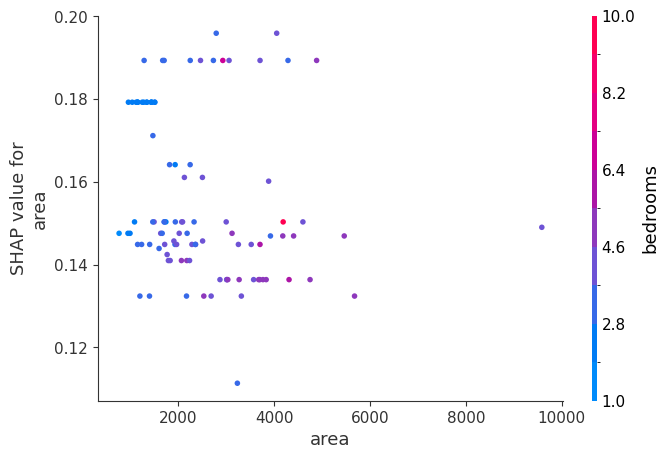

In [69]:
# Dependence plots based on a feature with defined interaction feature
feature = "area"
interaction_feature = "bedrooms"
shap.dependence_plot(feature, shap_values_target.values, X_test, interaction_index=interaction_feature)

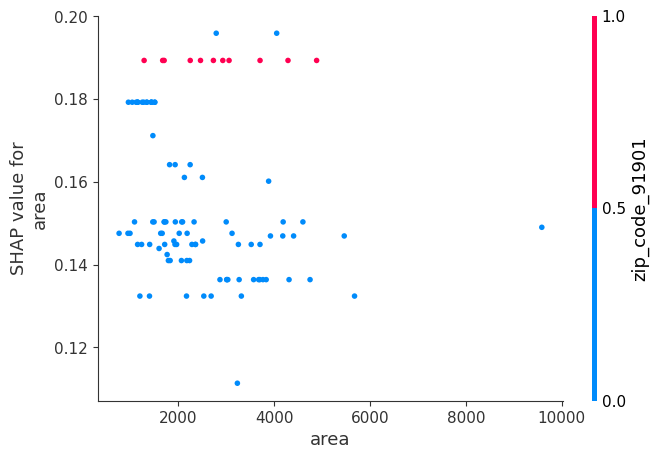

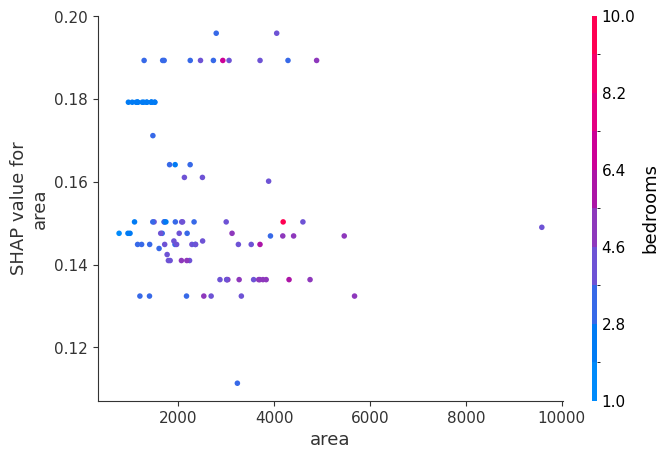

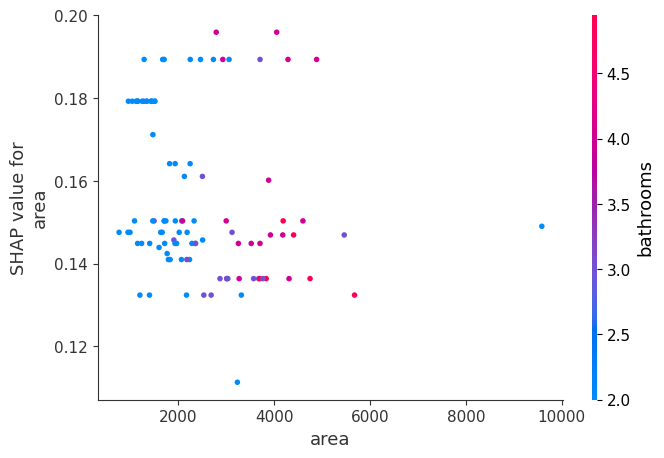

In [70]:
# use approximate_interactions to guess top three possible interactions
feature = "area"
inds = shap.approximate_interactions(feature, shap_values_target.values, X_test)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot(feature, shap_values_target.values, X_test, interaction_index=inds[i])